#**Airbnb Bookings Analysis** 
## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>



In [ ]:
#Import package
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Mount your drive and read the csv file. Make sure you are using the correct file path
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading csv File

file_path = '/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv'
airbnb_df=pd.read_csv(file_path)

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [ ]:
airbnb_df.isna().sum()
# ( airbnb_df.isna().sum() ) / len(airbnb_df) *100
# the above line gives the % of null values in every column which is very helpfull when we want to deal with the null values.

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
airbnb_df.shape

(48895, 16)

In [ ]:
airbnb_df['reviews_per_month'].fillna(0,inplace=True)

In [ ]:
airbnb_df.drop(['last_review','calculated_host_listings_count'],axis=1,inplace=True)

In [ ]:
airbnb_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355


In [ ]:
airbnb_df.isna().sum()

id                      0
name                   16
host_id                 0
host_name              21
neighbourhood_group     0
neighbourhood           0
latitude                0
longitude               0
room_type               0
price                   0
minimum_nights          0
number_of_reviews       0
reviews_per_month       0
availability_365        0
dtype: int64

In [ ]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'availability_365'],
      dtype='object')

In [ ]:
airbnb_df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

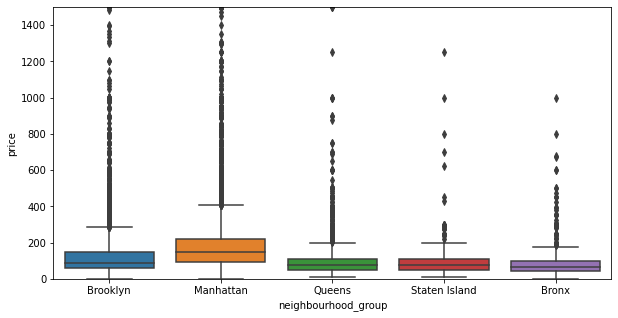

In [ ]:
plt.figure(figsize=(10,5))
plt.ylim(0,1500)
sns.boxplot(x='neighbourhood_group', y='price',data=airbnb_df)
plt.show()

In [ ]:
len(airbnb_df[airbnb_df['price']>500])

1044

In [ ]:
airbnb_df['price'][airbnb_df['price']>600] = 600

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


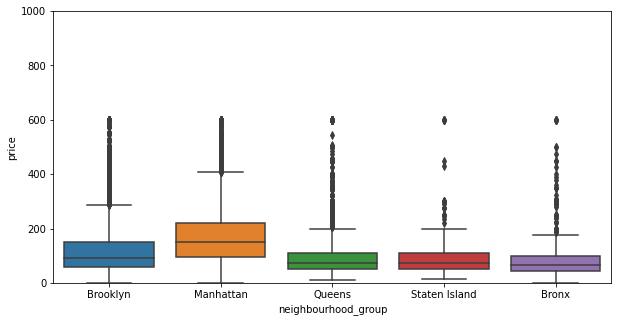

In [ ]:
plt.figure(figsize=(10,5))
plt.ylim(0,1000)
sns.boxplot(x='neighbourhood_group', y='price',data=airbnb_df)
plt.show()

In [ ]:
airbnb_df.groupby(['neighbourhood_group'],dropna=True)['room_type'].value_counts()

neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

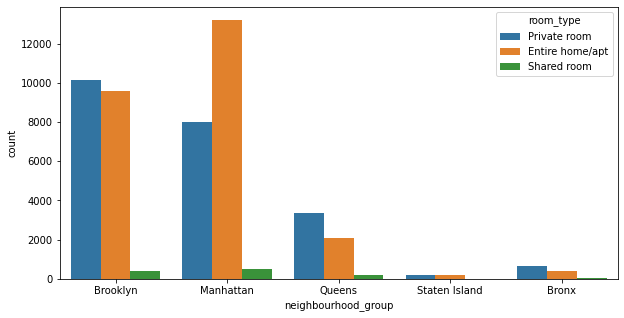

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='neighbourhood_group', hue='room_type', data=airbnb_df)
plt.show()

In [ ]:
n = airbnb_df.neighbourhood_group.unique()
nbd_grp = list(n)

In [ ]:
def plot_nbd():
  plt.figure(figsize=(10,5))
  nbd_cnts=[]
  for i in nbd_grp:
    nbd_cnts.append(airbnb_df['id'][airbnb_df['neighbourhood_group']==i].value_counts().sum())
    
  plt.plot(nbd_grp,nbd_cnts)

  plt.legend(nbd_grp)
  print(nbd_cnts)

[20104, 21661, 5666, 373, 1091]


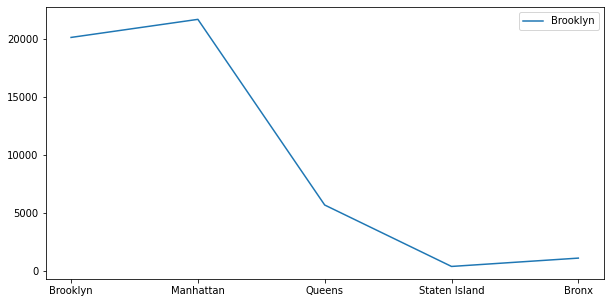

In [ ]:
plot_nbd()